# Define an option class

In [1]:
import numpy as np
import datetime
import matplotlib.pyplot as plt


class Option(object):
    def __init__(self,strikePrice,optionCost,expDate=None):
        self.strikePrice=strikePrice
        self.optionCost=optionCost
        self.expDate=expDate
    def get_strikePrice(self):
        return self.strikePrice
    def get_optionCost(self):
        return self.optionCost
    def profit_optionPrice(self,currentOptionPrice):
        return(currentOptionPrice-self.optionCost)
    def compareToOption(self,currentOptionPrice):
        if self.optionCost<currentOptionPrice:
            print ('the option is making profit')
        elif self.optionCost>currentOptionPrice:
            print('the option is losing money')
        else:
            print('the option is in even')
    def __str__(self):
        return(' option expDate is:{0:%B %d, %Y}\n strikePrice is: {1:.2f}\n optionCost is: {2:.2f}'\
               .format(self.expDate,self.strikePrice,self.optionCost))
        

class CallOption(Option):
    def __init__(self,strikePrice,optionCost,expDate=None):
        Option.__init__(self,strikePrice,optionCost,expDate)
        self.breakevenPrice=self.strikePrice-self.optionCost
    def profit_stockPrice(self,stockPrice):
        return(max(stockPrice-self.strikePrice,0)-self.optionCost)
    def compareToStock(self,stockPrice):
        if stockPrice>self.strikePrice:
            print('the call option is in the money')
        elif stockPrice<self.strikePrice:
            print('the call option is out of money')
        else:
            print('the put option is on the money')
# current price 35
# call option executing price 30
# call option price 8
# break even price 

class PutOption(Option):
    def __init__(self,strikePrice,optionCost,expDate=None):
        Option.__init__(self,strikePrice,optionCost,expDate)
        self.breakevenPrice=self.strikePrice+self.optionCost
    def profit_stockPrice(self,stockPrice):
        return (max(self.strikePrice-stockPrice,0)-self.optionCost)
    def compareToStock(self,stockPrice):
        if stockPrice <self.strikePrice:
            print('the put option is in the money')            
        elif stockPrice>self.strikePrice:
            print('the put option is out of money')
        else:
            print('the put option is on the money')


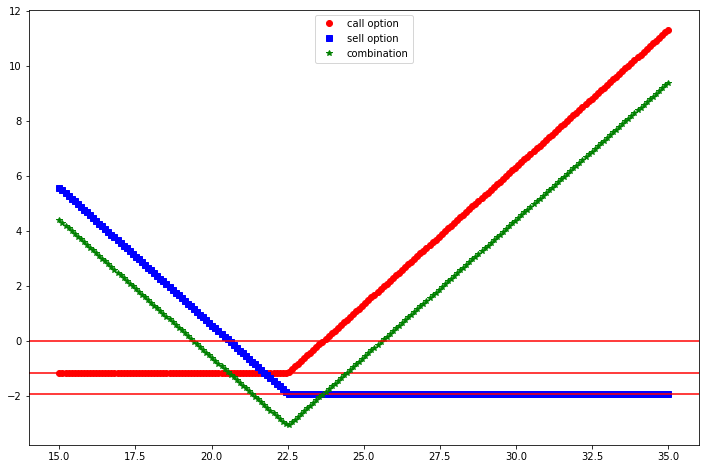

In [6]:
def combination(call,put,stockPrice):
    wholeProfit_stockPrice=call.profit_stockPrice(stockPrice)+put.profit_stockPrice(stockPrice)
   # wholeProfit_optionPrice=call.profit_optionPrice(0.1)+put.profit_optionPrice(9)
    return wholeProfit_stockPrice

if __name__=='__main__':
    expDate=datetime.datetime(2018,10,19)   
    # call option
    callExPrice=22.5
    callOptionCost=1.18
    callExDate=expDate
    #put option
    putExPrice=22.5
    putOptionCost=1.93
    putExDate=expDate
    # current stock 
    currentStockPrice=21.8
    
    call1019=CallOption(callExPrice,callOptionCost,callExDate)
    put1019=PutOption(putExPrice,putOptionCost,putExDate)
    wholeProfit=combination(call1019,put1019,21.78)
    
    priceList=np.linspace(15,35,200)
    com_profitList=[combination(call1019,put1019,x) for x in priceList]
    callOption_profitList=[call1019.profit_stockPrice(x) for x in priceList]
    putOption_profitList=[put1019.profit_stockPrice(x) for x in priceList]
    #plt.figure(1, figsize=(9, 6))
    plt.figure(figsize=(12,8))
    plt.plot(priceList,callOption_profitList,'ro',label='call option')
    plt.axhline(y=-callOptionCost,color='r',linestyle='-')
    plt.plot(priceList,putOption_profitList,'bs',label='sell option')
    plt.axhline(y=-putOptionCost,color='r',linestyle='-')
    plt.plot(priceList,com_profitList,'g*',label='combination')
    plt.axhline(y=0,color='r',linestyle='-')
    plt.legend(loc='upper center')